---

### Southern Water Corp Student Project
- Southern Water Corp: simulated organization providing desalinated water to public, private, and residential markets
- Focus: Planned maintenance scheduled for the next financial year has drawn focus to prevent untimely asset failure so as to avoid additional maintenance costs

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md 
from matplotlib.dates import DateFormatter
%matplotlib inline
import numpy as np
import seaborn as sbn
import pandas as pd
import statsmodels.api as sm

---------------------------------------------------------------------------

In [2]:
dataframe_1 = pd.read_csv("Desalination_Unit_File_001.csv", header=1)
dataframe_2 = pd.read_excel("Desalination_Unit_File_002.xlsx", header=1)
dataframe_3 = pd.read_excel("Desalination_Unit_File_003.xlsx", header=1)
frames =[dataframe_1, dataframe_2, dataframe_3]
df = pd.concat(frames)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11998 entries, 0 to 2001
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SURJEK_FLOW_METER_1          6998 non-null   float64
 1   SURJEK_FLOW_METER_2          6998 non-null   float64
 2   ROTATIONAL_PUMP_RPM          6998 non-null   float64
 3   SURJEK_PUMP_TORQUE           6998 non-null   float64
 4   MAXIMUM_DAILY_PUMP_TORQUE    6998 non-null   float64
 5   SURJEK_AMMONIA_FLOW_RATE     6998 non-null   float64
 6   SURJEK_TUBE_PRESSURE         6998 non-null   float64
 7   SURJEK_ESTIMATED_EFFICIENCY  6998 non-null   float64
 8   PUMP FAILURE (1 or 0)        6997 non-null   float64
 9   TIMEFRAME                    6998 non-null   object 
dtypes: float64(9), object(1)
memory usage: 1.0+ MB


In [4]:
df.describe()

,SURJEK_FLOW_METER_1,SURJEK_FLOW_METER_2,ROTATIONAL_PUMP_RPM,SURJEK_PUMP_TORQUE,MAXIMUM_DAILY_PUMP_TORQUE,SURJEK_AMMONIA_FLOW_RATE,SURJEK_TUBE_PRESSURE,SURJEK_ESTIMATED_EFFICIENCY,PUMP FAILURE (1 or 0)
count,6998.000000,6998.000000,6998.000000,6998.000000,6998.000000,6998.0,6998.000000,6998.000000,6997.000000
mean,5.946164,5.157796,6.607023,39.091614,427.295713,0.0,380.696815,0.646718,0.009290
std,20.351494,24.444442,20.843080,124.174236,473.250507,0.0,6.817019,0.755587,0.095941
min,-0.527344,-9.118652,-1.000000,-2.436085,-2.278918,0.0,0.000000,0.000000,0.000000
25%,0.000000,-4.766639,-0.687240,-2.030993,9.177878,0.0,379.028300,0.000000,0.000000
50%,0.313672,-0.351562,-0.013326,-1.896835,285.493400,0.0,381.317366,0.204052,0.000000
75%,0.704162,0.981540,0.000000,-1.680961,285.493400,0.0,382.690400,1.240724,0.000000
max,127.221700,313.989300,99.000000,1284.681000,1284.838000,0.0,386.352500,2.000000,1.000000


In [5]:
df.set_index("TIMEFRAME",inplace=True)

In [6]:
df.head()

,SURJEK_FLOW_METER_1,SURJEK_FLOW_METER_2,ROTATIONAL_PUMP_RPM,SURJEK_PUMP_TORQUE,MAXIMUM_DAILY_PUMP_TORQUE,SURJEK_AMMONIA_FLOW_RATE,SURJEK_TUBE_PRESSURE,SURJEK_ESTIMATED_EFFICIENCY,PUMP FAILURE (1 or 0)
TIMEFRAME,,,,,,,,,
09/12/2014 0:00,0.0,-4.768066,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
09/12/2014 0:01,0.0,-4.855957,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
09/12/2014 0:01,0.0,-7.447938,0.0,0.0,0.0,0.0,378.112800,0.0,0.0
09/12/2014 0:01,0.0,-8.745117,0.0,0.0,0.0,0.0,379.028300,0.0,0.0
09/12/2014 0:02,0.0,-6.877441,0.0,0.0,0.0,0.0,378.959919,0.0,0.0


---------------------------------------------------------------------------

### Premature asset degradation has resulted in a rise in annual maintenance costs putting pressure in SWC's break-even capabilities and requiring either reduced production costs or proactive maintenance strategies
- Preventing untimely asset failure is essential
- Modeling/predicting pump failure may help reduce the number of unplanned maintenance events

Text(0.5, 1.0, 'BoxPlot for all attributes')

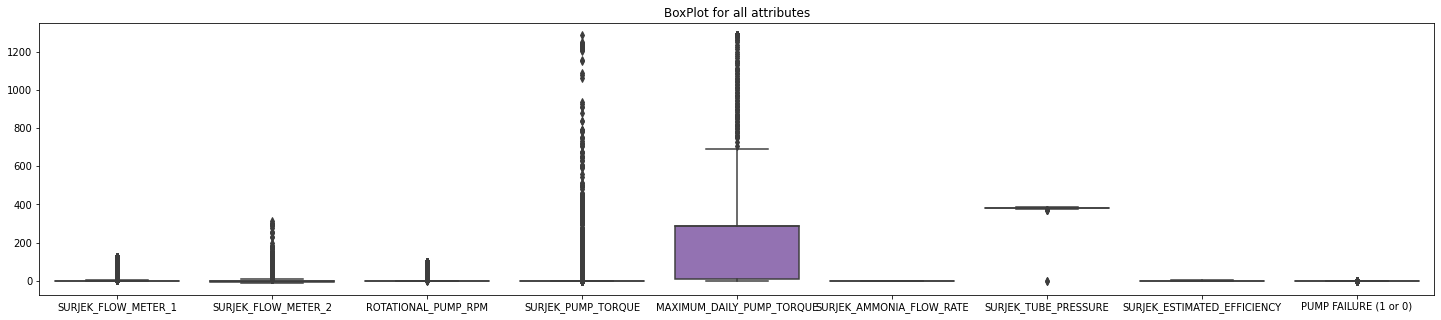

In [7]:
mpl.rcParams['figure.figsize'] = (25,5)
sbn.boxplot(data=df)
plt.title("BoxPlot for all attributes")

---------------------------------------------------------------------------

### Pump torque and maximum daily torque show significant outliers, but these variables make it difficult to see the big picture for other variables. Removal of them shows clearer picture that pump flow may also be strongly correlated with pump failure

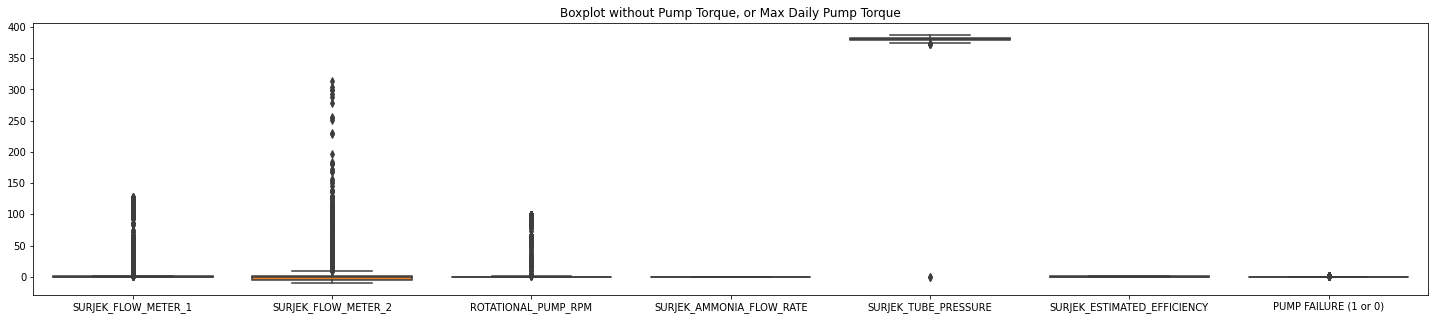

In [8]:
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY', 'PUMP FAILURE (1 or 0)'] 
mpl.rcParams['figure.figsize'] = (25,5)

df_filt = df[filt]
sbn.boxplot(data=df_filt)
plt.title("Boxplot without Pump Torque, or Max Daily Pump Torque")
plt.show()

---------------------------------------------------------------------------

### Corroborating our suspicions of the major contributors at hand, splitting the data into normal vs. abnormal behavior resulted in 3 particular signatures: pump flow, pump torque, and maximum daily torque are likely all closely related to pump failure

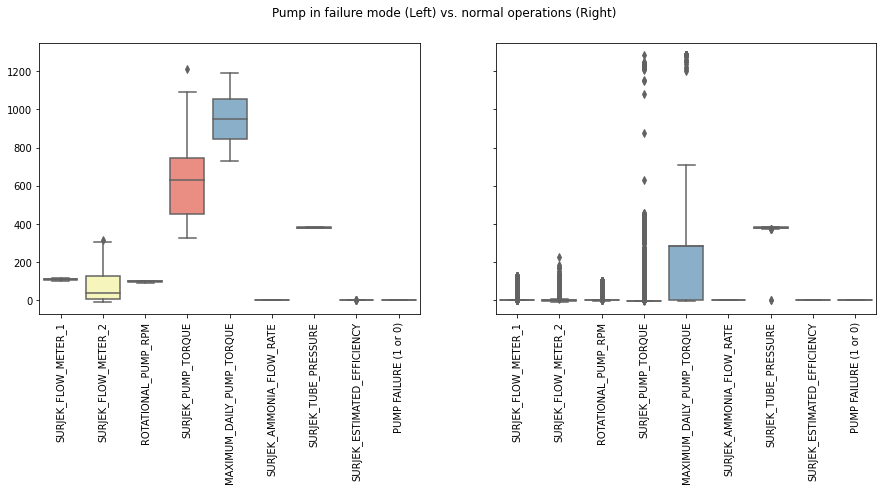

In [9]:
df_boxplots = df[df['PUMP FAILURE (1 or 0)']==1]
mpl.rcParams['figure.figsize'] = (15,5)
fig, axes = plt.subplots(1, 2, sharey=True)

fig.suptitle("Pump in failure mode (Left) vs. normal operations (Right)")
sbn.boxplot(data=df_boxplots, orient='v', palette='Set3', ax=axes[0])

df_boxplots = df[df['PUMP FAILURE (1 or 0)']==0]
sbn.boxplot(data=df_boxplots, orient='v', palette='Set3', ax=axes[1])

for ax in fig.axes:
    mpl.pyplot.sca(ax)
    plt.xticks(rotation=90)
    
plt.show()

---------------------------------------------------------------------------

### Raw timeplot for all variables makes it difficult to see which variables are behaving abnormally during pump failure:

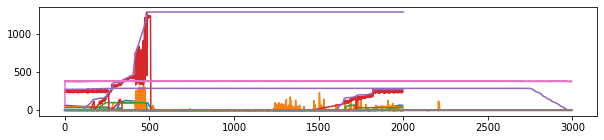

In [22]:
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']
filt2 = ['PUMP FAILURE (1 or 0)']
colList = df[filt].columns
mpl.rcParams['figure.figsize'] = (10,2)

for i in colList:
    failureState = df[filt2]
    ax = df[i].plot()

### Rolling st.dev timeplot for all variables demonstrates more clearly which variables are behaving abnormally during pump failure:

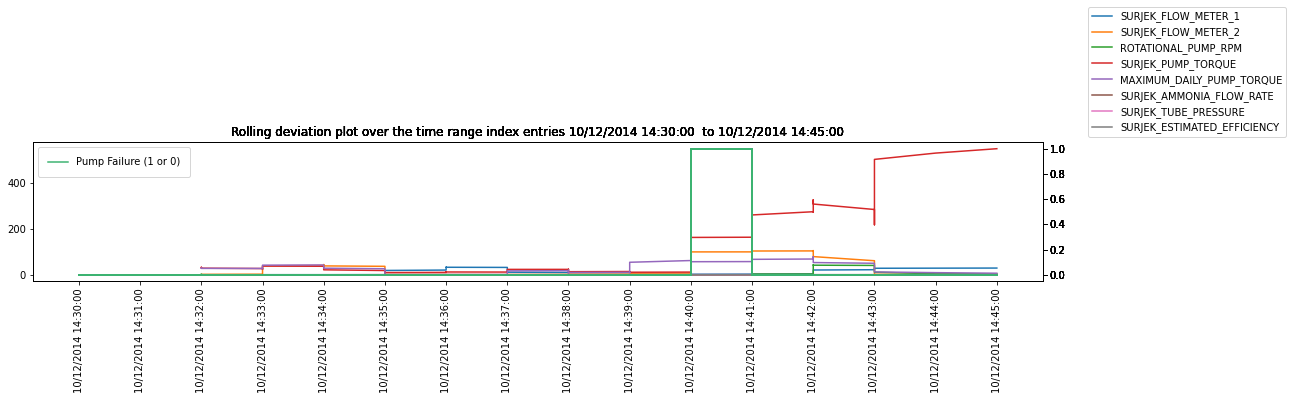

In [60]:
from datetime import datetime
df = pd.concat(frames)
df['TIMEFRAME'] = pd.to_datetime(df['TIMEFRAME']).apply(lambda x: x.strftime('%d/%m/%Y %H:%M:%S')if not pd.isnull(x) else '')

filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY','PUMP FAILURE (1 or 0)', 'TIMEFRAME']
filt2 = ['PUMP FAILURE (1 or 0)']
filt3 = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']

colList = df[filt].columns
mpl.rcParams['figure.figsize'] = (15,4)
df.set_index('TIMEFRAME', inplace=True)

df = df[(df.index >= "10/12/2014 14:30:00")&(df.index <="10/12/2014 14:45:00")]
rollingDF = df.rolling(30).std()

colList = rollingDF[filt3].columns
rollingDF['PUMP FAILURE (1 or 0)'] = df['PUMP FAILURE (1 or 0)']

fig = plt.figure()
ax = plt.axes()
date_form = DateFormatter("%d/%m/%Y %H:%M:%S")
ax.xaxis.set_major_formatter(date_form)

for i in colList:
    ax.plot(rollingDF.index, rollingDF[i], label=i)
    ax2 = ax.twinx()
    ax2.plot(df[filt2], 'mediumseagreen', label='Pump Failure (1 or 0)')
    
    ax.xaxis.set_tick_params(rotation=90)

    plt.tight_layout()
    min_time = rollingDF.index.min()
    max_time= rollingDF.index.max()
    plt.title("Rolling deviation plot over the time range index entries " + str(min_time) + " " +  " to " + str(max_time))

ax.legend(bbox_to_anchor=(1.04,1), loc="lower left")   
ax2.legend(loc='upper left', borderpad=1)

plt.show()

---

### Raw time plot correlation matrix:

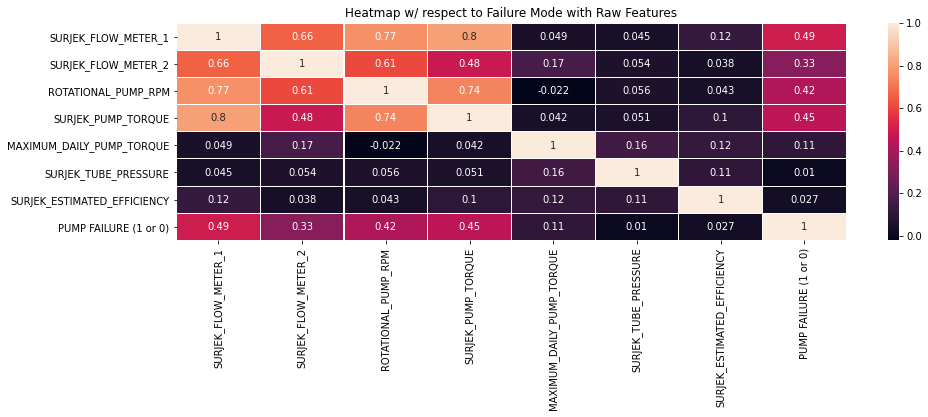

In [61]:
from datetime import datetime
df = pd.concat(frames)
df['TIMEFRAME'] = pd.to_datetime(df['TIMEFRAME'], format="%d/%m/%Y %H:%M:%S", infer_datetime_format=True )
df.set_index('TIMEFRAME', inplace=True)

filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY','PUMP FAILURE (1 or 0)']
df = df[filt]

corr = df.corr() 
fig, ax = plt.subplots()
sbn.heatmap(corr, annot=True,linewidths=.1,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax=ax)
plt.title("Heatmap w/ respect to Failure Mode with Raw Features")
plt.show()


### Rolling st.dev timeplot correlation matrix:

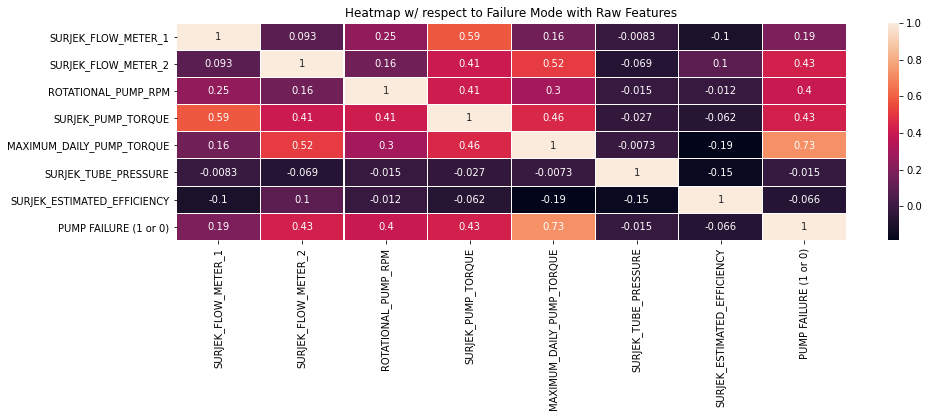

In [67]:
df = pd.concat(frames)
df['TIMEFRAME'] = pd.to_datetime(df['TIMEFRAME'], format="%d/%m/%Y %H:%M:%S", infer_datetime_format=True )
df.set_index('TIMEFRAME', inplace=True)

filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY','PUMP FAILURE (1 or 0)']

df = df[filt].rolling(30).std()
corr = df.corr()
fig, ax = plt.subplots() 
sbn.heatmap(corr, annot=True,linewidths=.1,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax=ax)
plt.title("Heatmap w/ respect to Failure Mode with Raw Features")

plt.show()

### Further analysis of rolling st.dev data where the pump was marked as failing yielded the 3 key variables that strongly correlated with failure signal, furthering confidence in previously detected trends:

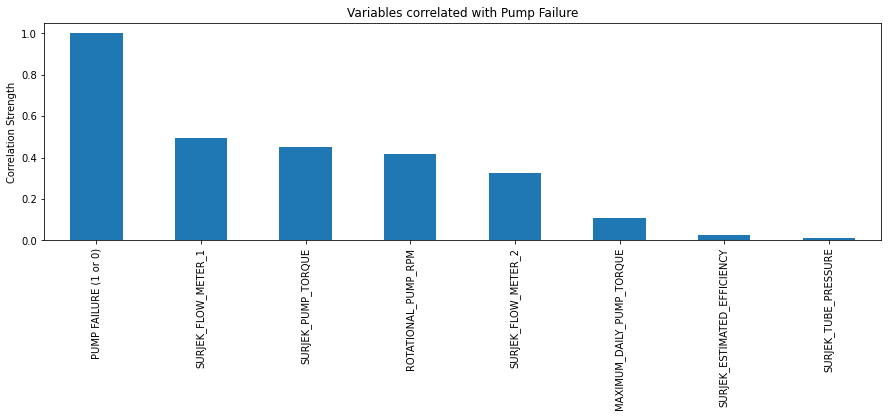

In [63]:
corr = corr.sort_values("PUMP FAILURE (1 or 0)", ascending=False)
corr['PUMP FAILURE (1 or 0)'].plot(kind='bar')
plt.title("Variables correlated with Pump Failure")
plt.ylabel("Correlation Strength")
plt.show()

---

### Creating a Multivariate Regression Model: raw time plot variables 

In [64]:
df_two = pd.concat(frames)
dependent_var = df_two['PUMP FAILURE (1 or 0)']
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY', 'PUMP FAILURE (1 or 0)']

df_two = df_two[filt]
df_two['PumpFailure'] = dependent_var
df_two = df_two.fillna(0)
X = df_two.drop(['PUMP FAILURE (1 or 0)', 'PumpFailure'],axis=1)
X = sm.add_constant(X)
y = df_two['PumpFailure']

OLSmodel = sm.OLS(y, X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PumpFailure   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     622.8
Date:                Sat, 23 May 2020   Prob (F-statistic):               0.00
Time:                        13:31:13   Log-Likelihood:                 16172.
No. Observations:               11998   AIC:                        -3.233e+04
Df Residuals:                   11990   BIC:                        -3.227e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         5.63e-05      0.001      0.063      0.950      -0.002       0.002
SURJEK_FLOW_METER_1             0.0017   7.62e-05     22.060      0.000       0.002       0.002
SURJEK_FLOW_METER_2            -0.0001    4.4e-05     -2.738      0.006      -0.000   -3.43e-05
ROTATIONAL_PUMP_RPM             0.0003   6.23e-05      5.257      0.000       0.000       0.000
SURJEK_PUMP_TORQUE              0.0001   1.09e-05      9.160      0.000    7.87e-05       0.000
MAXIMUM_DAILY_PUMP_TORQUE     1.97e-05   1.65e-06     11.911      0.000    1.65e-05    2.29e-05
SURJEK_AMMONIA_FLOW_RATE     3.075e-19    1.8e-20     17.081      0.000    2.72e-19    3.43e-19
SURJEK_TUBE_PRESSURE         -2.94e-05   3.92e-06     -7.503      0.000   -3.71e-05   -2.17e-05
SURJEK_ESTIMATED_EFFICIENCY    -0.0054      0.001     -5.314      0.000      -0.007      -0.003
==============================================================================
Omnibus:                    16240.255   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5041940.924
Skew:                           7.699   Prob(JB):                         0.00
Kurtosis:                     102.240   Cond. No.                     2.06e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.04e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Multvariate equation: rolling st.dev data for all variables better predict pump failure with r-squared and adjusted r-squared = 0.623:

In [17]:
df_two = pd.concat(frames)
dependent_var = df_two['PUMP FAILURE (1 or 0)']
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY', 'PUMP FAILURE (1 or 0)']

df_two = df_two[filt].rolling(30).std()
df_two['PumpFailure'] = dependent_var
df_two = df_two.fillna(0)
X = df_two.drop(['PUMP FAILURE (1 or 0)', 'PumpFailure'],axis=1)
X = sm.add_constant(X)
y = df_two['PumpFailure']

OLSmodel = sm.OLS(y, X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PumpFailure   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     2829.
Date:                Sat, 23 May 2020   Prob (F-statistic):               0.00
Time:                        14:15:09   Log-Likelihood:                 20162.
No. Observations:               11998   AIC:                        -4.031e+04
Df Residuals:                   11990   BIC:                        -4.025e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0045      0.001     -8.798      0.000      -0.005      -0.003
SURJEK_FLOW_METER_1            -0.0029      0.000    -11.238      0.000      -0.003      -0.002
SURJEK_FLOW_METER_2             0.0016   4.89e-05     32.434      0.000       0.001       0.002
ROTATIONAL_PUMP_RPM            -0.0066      0.000    -40.408      0.000      -0.007      -0.006
SURJEK_PUMP_TORQUE              0.0003   1.95e-05     14.061      0.000       0.000       0.000
MAXIMUM_DAILY_PUMP_TORQUE       0.0058    6.7e-05     86.504      0.000       0.006       0.006
SURJEK_AMMONIA_FLOW_RATE    -3.018e-19   1.77e-19     -1.704      0.088   -6.49e-19    4.55e-20
SURJEK_TUBE_PRESSURE           -0.0010      0.000     -2.880      0.004      -0.002      -0.000
SURJEK_ESTIMATED_EFFICIENCY    -0.0082      0.002     -5.297      0.000      -0.011      -0.005
==============================================================================
Omnibus:                     5709.759   Durbin-Watson:                   0.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2128589.057
Skew:                           1.008   Prob(JB):                         0.00
Kurtosis:                      68.221   Cond. No.                     1.79e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.03e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Through utilization of descriptive and inferential statistics, 3 key variables strongly correlated with desalination pump failure, enabling development of a multivariate equation capable of proactively identifying abnormal pump behavior 

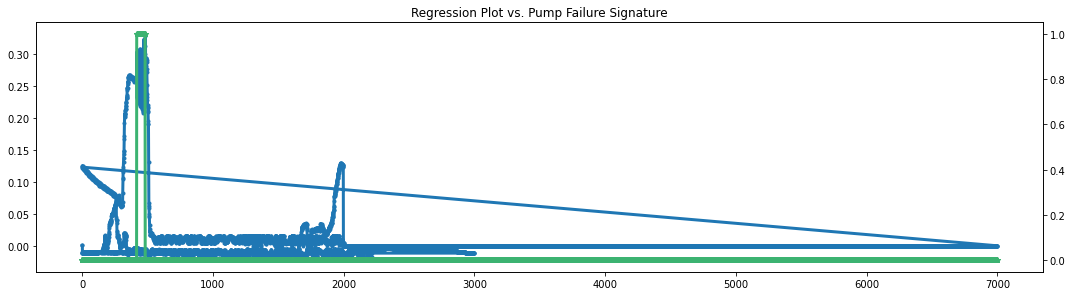

In [65]:
mpl.rcParams['figure.figsize'] = (15,4)

ax = OLSmodelResult.predict(X).plot(linewidth=3, marker='.')
ax2 = ax.twinx()
ax2.plot(df_two.PumpFailure, 'mediumseagreen', linewidth=3, marker='*')

plt.tight_layout()
plt.title("Regression Plot vs. Pump Failure Signature")
plt.show()